In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#DATA CREATION

#Generates DataFrame with Stock Name, Day, and Price.

#stock_name = [1,2]
#Generates stock_name list.
stock_name = []
for i in range(1,101): #range(start#, END# +1)
  stock_name.append(i)

#day = [1, 2, 3]
#Generates day list.
day = []
for i in range(1,31): #range(start#, END# +1)
  day.append(i)


stock_day_price = []

for z in stock_name:
    for x in day:
        for y in sp.random.uniform(low = sp.random.uniform(low = 10, high = 50, size = 1), high = sp.random.uniform(low = 51, high = 100, size = 1), size = 1):
            stock_day_price.append((z, x, y))
            stock_day_price_df = pd.DataFrame(stock_day_price, columns = ("Stock_Name", "Day", "Price"))

In [3]:
stock_day_price_df

,Stock_Name,Day,Price
0,1,1,59.435847
1,1,2,69.007290
2,1,3,38.149967
3,1,4,72.794244
4,1,5,71.947120
...,...,...,...
2995,100,26,61.577169
2996,100,27,68.746094
2997,100,28,39.074869
2998,100,29,56.488404


In [4]:
#Generates DataFrame with Stock Name, Entry Day, and Exit Day.
#stock = [1, 2]
#entry_day = [1, 2, 3]
#exit_day = [1, 2, 3]

edxd = []

for z in stock_name:
    for x in day:
        for y in day:
            if x < y:  
                edxd.append((z, x, y))
                edxd_df = pd.DataFrame(edxd, columns = ("Stock_Name", "Entry_Day", "Exit_Day"))

In [5]:
edxd_df

,Stock_Name,Entry_Day,Exit_Day
0,1,1,2
1,1,1,3
2,1,1,4
3,1,1,5
4,1,1,6
...,...,...,...
43495,100,27,29
43496,100,27,30
43497,100,28,29
43498,100,28,30


In [6]:
#Combining Dataframes.
edxd_sdp_df1 = pd.merge(edxd_df, stock_day_price_df,  how='left', left_on=["Stock_Name", "Entry_Day"], right_on = ["Stock_Name", "Day"])
edxd_sdp_df1

,Stock_Name,Entry_Day,Exit_Day,Day,Price
0,1,1,2,1,59.435847
1,1,1,3,1,59.435847
2,1,1,4,1,59.435847
3,1,1,5,1,59.435847
4,1,1,6,1,59.435847
...,...,...,...,...,...
43495,100,27,29,27,68.746094
43496,100,27,30,27,68.746094
43497,100,28,29,28,39.074869
43498,100,28,30,28,39.074869


In [7]:
#Renamed Column
edxd_sdp_df1.rename(columns = {'Price': 'Entry_Price', 'Day':'ED'}, inplace = True)
edxd_sdp_df1

,Stock_Name,Entry_Day,Exit_Day,ED,Entry_Price
0,1,1,2,1,59.435847
1,1,1,3,1,59.435847
2,1,1,4,1,59.435847
3,1,1,5,1,59.435847
4,1,1,6,1,59.435847
...,...,...,...,...,...
43495,100,27,29,27,68.746094
43496,100,27,30,27,68.746094
43497,100,28,29,28,39.074869
43498,100,28,30,28,39.074869


In [8]:
edxd_sdp_df2 = pd.merge(edxd_sdp_df1, stock_day_price_df,  how='left', left_on=["Stock_Name", "Exit_Day"], right_on = ["Stock_Name", "Day"])

#Rename Column
edxd_sdp_df2.rename(columns = {'Price':'Exit_Price', 'Day':'XD'}, inplace = True)

#Delete ED & XD Columns
#edxd_sdp_df2.drop([['ED', 'XD']], 1, inplace=True)
edxd_sdp_df2.drop(edxd_sdp_df2.columns[[3, 5]], 1, inplace=True)
edxd_sdp_df2

C:\Users\Acer\AppData\Local\Temp/ipykernel_9188/3026865744.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  edxd_sdp_df2.drop(edxd_sdp_df2.columns[[3, 5]], 1, inplace=True)


,Stock_Name,Entry_Day,Exit_Day,Entry_Price,Exit_Price
0,1,1,2,59.435847,69.007290
1,1,1,3,59.435847,38.149967
2,1,1,4,59.435847,72.794244
3,1,1,5,59.435847,71.947120
4,1,1,6,59.435847,87.613945
...,...,...,...,...,...
43495,100,27,29,68.746094,56.488404
43496,100,27,30,68.746094,68.855064
43497,100,28,29,39.074869,56.488404
43498,100,28,30,39.074869,68.855064


In [9]:
#####################################-----------MAIN DATA TABLE---------##############################################

#Creating Profit Column
edxd_sdp_df2['Profit'] = edxd_sdp_df2['Exit_Price'] - edxd_sdp_df2['Entry_Price']
edxd_sdp_df2

,Stock_Name,Entry_Day,Exit_Day,Entry_Price,Exit_Price,Profit
0,1,1,2,59.435847,69.007290,9.571443
1,1,1,3,59.435847,38.149967,-21.285881
2,1,1,4,59.435847,72.794244,13.358396
3,1,1,5,59.435847,71.947120,12.511273
4,1,1,6,59.435847,87.613945,28.178098
...,...,...,...,...,...,...
43495,100,27,29,68.746094,56.488404,-12.257691
43496,100,27,30,68.746094,68.855064,0.108970
43497,100,28,29,39.074869,56.488404,17.413535
43498,100,28,30,39.074869,68.855064,29.780196


In [10]:
#ANALYSIS

In [11]:

#Takes the minimum price of the column 'Entry_Price' and lists both it's corresponding 'Stock_Name' and the minimum entry price.
minprice_bygroup = edxd_sdp_df2.groupby(['Stock_Name'])['Entry_Price'].min().reset_index()
minprice_bygroup.rename(columns = {'Entry_Price':'Min_Entry_Price'}, inplace = True)

minprice_withday = pd.merge(minprice_bygroup, edxd_sdp_df2,  how='left', left_on=["Stock_Name", "Min_Entry_Price"], right_on = ["Stock_Name", "Entry_Price"])

minprice_withday

,Stock_Name,Min_Entry_Price,Entry_Day,Exit_Day,Entry_Price,Exit_Price,Profit
0,1,21.102696,29,30,21.102696,31.906586,10.803889
1,2,27.841541,18,19,27.841541,50.003399,22.161858
2,2,27.841541,18,20,27.841541,45.304164,17.462623
3,2,27.841541,18,21,27.841541,51.470356,23.628815
4,2,27.841541,18,22,27.841541,52.293564,24.452023
...,...,...,...,...,...,...,...
1562,100,26.192664,9,26,26.192664,61.577169,35.384505
1563,100,26.192664,9,27,26.192664,68.746094,42.553431
1564,100,26.192664,9,28,26.192664,39.074869,12.882205
1565,100,26.192664,9,29,26.192664,56.488404,30.295740


In [12]:
#Takes the minimum price of the column 'Exit_Price' and lists both it's corresponding 'Stock_Name' and the maximum entry price.
maxprice_bygroup = minprice_withday.groupby(['Stock_Name'])['Exit_Price'].max().reset_index()
maxprice_bygroup.rename(columns = {'Exit_Price':'Max_Exit_Price'}, inplace = True)
maxprice_bygroup

min_entry_max_exit = pd.merge(minprice_withday, maxprice_bygroup,  how='left', left_on=["Stock_Name", "Exit_Price"], right_on = ["Stock_Name", "Max_Exit_Price"])

min_entry_max_exit = min_entry_max_exit.dropna()

min_entry_max_exit = min_entry_max_exit.reindex(columns= ['Stock_Name', 'Min_Entry_Price','Max_Exit_Price','Entry_Day','Exit_Day', 'Profit'])
min_entry_max_exit

,Stock_Name,Min_Entry_Price,Max_Exit_Price,Entry_Day,Exit_Day,Profit
0,1,21.102696,31.906586,29,30,10.803889
11,2,27.841541,80.375756,18,29,52.534215
29,3,23.523970,76.881939,3,20,53.357970
63,4,12.634446,90.505385,6,30,77.870939
82,5,18.843802,74.005944,9,28,55.162142
...,...,...,...,...,...,...
1502,96,21.461620,84.318300,28,30,62.856680
1513,97,21.910873,78.782669,16,27,56.871796
1534,98,30.655025,82.617831,5,23,51.962806
1545,99,16.028667,73.997881,26,30,57.969214


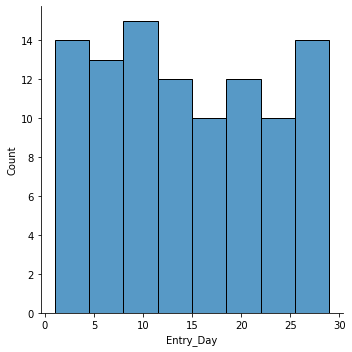

In [13]:
min_entry_day_g= min_entry_max_exit['Entry_Day']
# Generate histogram/distribution plot
sns.displot(min_entry_day_g)
plt.show()

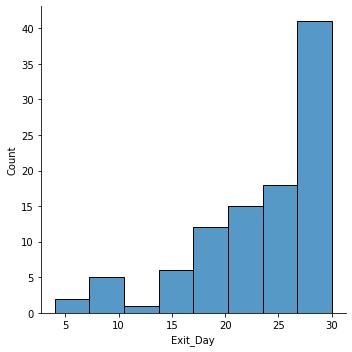

In [14]:
max_exity_day_g = min_entry_max_exit['Exit_Day']
# Generate histogram/distribution plot
sns.displot(max_exity_day_g)
plt.show()

<AxesSubplot:xlabel='Entry_Day', ylabel='Exit_Day'>

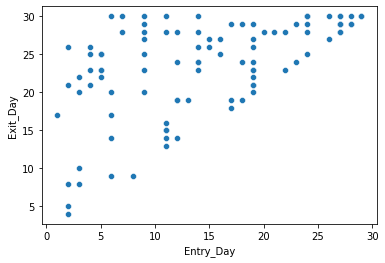

In [15]:
sns.scatterplot(data=min_entry_max_exit, x="Entry_Day", y="Exit_Day")


In [ ]:
#####################################---START OF PRICE REVERSION & MOMENTUM DATA CREATION & ANALYSIS---###################################

#For Reference
stock_day_price_df

meanprice_bygroup = stock_day_price_df.groupby(['Stock_Name'])['Price'].mean().reset_index()
meanprice_bygroup.rename(columns = {'Price':'Mean_Price'}, inplace = True)
meanprice_bygroup

In [ ]:
#Shows the mean price of a single stock based on the prices on different days.
#Combines stockdaypricedf and meanpricebygroup
stock_pricereversion = pd.merge(stock_day_price_df, meanprice_bygroup,  how='left', left_on=["Stock_Name"], right_on = ["Stock_Name"])
stock_pricereversion

In [ ]:
#Stocks, Day, Price with Price Reversion Data

stock_pricereversion['Price_Reversion'] = stock_pricereversion['Price'] - stock_pricereversion['Mean_Price']
stock_pricereversion

In [ ]:
#Calculating Lag Price and Momentum
stock_pricereversion['Lag1_Price'] = stock_pricereversion['Price'].shift(-1) 
stock_pricereversion['Momentum'] = (stock_pricereversion['Price'].shift(-1) - stock_pricereversion['Price']) /  stock_pricereversion['Price']
stock_pricereversion

In [ ]:
#Rearranges columns for clarity
SPM =stock_pricereversion.reindex(columns= ['Stock_Name', 'Day', 'Price','Lag1_Price', 'Mean_Price', 'Price_Reversion', 'Momentum'])
SPM